# Actividad 1
------------------------------


Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)



| Atributo Ingles      | Atributo Español       | Significado                                          |
|-----------------------------|-----------------------------|------------------------------------------------------------|
| Claim                       | Estado del reclamo           | Claim Status                                               |
| Agency                      | Nombre de la agencia         | Agency Name                                                |
| Agency Type                 | Tipo de agencias de seguros  | Type of Insurance Agency                                   |
| Distribution Channel        | Canal de distribución        | Distribution Channel of Insurance Agency                    |
| Product Name                | Nombre de los productos      | Name of the Insurance Product                              |
| Duration                    | Duración del viaje           | Duration of the Trip                                       |
| Destination                 | Destino del viaje            | Destination of the Trip                                    |
| Net Sales                   | Monto de ventas              | Net Sales of Insurance Policies                            |
| Commision (in value)        | Comisión recibida            | Commission Received by Insurance Agency                     |
| Gender                      | Género del asegurado         | Gender of the Insured                                      |
| Age                         | Edad del asegurado           | Age of the Insured                                         |


URL DataSet:  https://www.kaggle.com/datasets/mhdzahier/travel-insurance/data


In [96]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## 1. Carga de Dataset

In [97]:
df = pd.read_csv('./sample_data/dataset.csv')

df.head(5)

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


## 2. Exploracion de Datos

In [98]:
df.shape

(62288, 12)

In [99]:
# obteniendo información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    62288 non-null  int64  
 1   Age                   62288 non-null  int64  
 2   Agency                62288 non-null  object 
 3   Agency Type           62288 non-null  object 
 4   Commision (in value)  62288 non-null  float64
 5   Destination           62288 non-null  object 
 6   Distribution Channel  62288 non-null  object 
 7   Duration              62288 non-null  int64  
 8   Gender                22713 non-null  object 
 9   Net Sales             62288 non-null  float64
 10  Product Name          62288 non-null  object 
 11  Claim                 62288 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


In [100]:
# renombrado de columnas

columns_rename = {'ID': 'id',
 'Age': 'age',
 'Agency': 'agency',
 'Agency Type': 'agency_type',
 'Commision (in value)': 'commision',
 'Destination': 'destination',
 'Distribution Channel': 'distribution_channel',
 'Duration': 'duration',
 'Gender': 'gender',
 'Net Sales': 'net_sales',
 'Product Name': 'product_name',
 'Claim': 'claim'}

df.rename(columns=columns_rename, inplace=True)

df.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [101]:
# obtenemos estadisticas de columnas 
df.describe(include='all')

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
count,62288.000000,62288.000000,62288,62288,62288.000000,62288,62288,62288.000000,22713,62288.000000,62288,62288.000000
unique,NaN,NaN,16,2,NaN,102,2,NaN,2,NaN,25,NaN
top,NaN,NaN,EPX,Travel Agency,NaN,SINGAPORE,Online,NaN,F,NaN,Cancellation Plan,NaN
freq,NaN,NaN,30415,40816,NaN,17796,61172,NaN,11484,NaN,15354,NaN
mean,32844.953458,39.666324,NaN,NaN,12.829703,NaN,NaN,60.958804,NaN,50.717064,NaN,0.200006
std,18065.417216,14.014652,NaN,NaN,23.498745,NaN,NaN,114.325330,NaN,63.166715,NaN,0.400008
min,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,-2.000000,NaN,-389.000000,NaN,0.000000
25%,17579.000000,33.000000,NaN,NaN,0.000000,NaN,NaN,10.000000,NaN,20.000000,NaN,0.000000
50%,33446.500000,36.000000,NaN,NaN,1.880000,NaN,NaN,25.000000,NaN,29.700000,NaN,0.000000
75%,48532.250000,43.000000,NaN,NaN,14.440000,NaN,NaN,59.000000,NaN,58.000000,NaN,0.000000


observamos valores negativos para duration y net_sales, de la misma forma age tiene un valor maximo de 118 que podría resultar atipico

Aqui tambien se aprecia que habría una gran cantidad de valores nulos para gender

#### 2.1 Nulidad en Datos

In [102]:
# obtener porcentaje de nulos por campo
porcentaje_nulos = df.isna().sum() / len(df) * 100
porcentaje_nulos

id                       0.000000
age                      0.000000
agency                   0.000000
agency_type              0.000000
commision                0.000000
destination              0.000000
distribution_channel     0.000000
duration                 0.000000
gender                  63.535512
net_sales                0.000000
product_name             0.000000
claim                    0.000000
dtype: float64

In [103]:
# se decidira eliminar la variable gender por tener una gran cantidad de nulos

df.drop(columns='gender', inplace=True)
df.head(1)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1


#### 2.3 Quitar Datos Considerados Errores

In [104]:
# Cantidad de datos con valores negativos
print("Cantidad de datos negativos para net_sales:", df[df.net_sales < 0].shape[0])
print("Cantidad de datos negativos para duration:", df[df.duration < 0].shape[0])

Cantidad de datos negativos para net_sales: 584
Cantidad de datos negativos para duration: 4


In [105]:
# Los datos se duración y net_sales con valores negativos deberian ser eliminados de nuestro dataset al considerarse como datos erroneos

df = df[(df.net_sales >= 0) & (df.duration >= 0)]
df.shape

(61700, 11)

#### 2.2 Verificar la existencia de duplicados

In [106]:
# cantidad nulos
df.duplicated().sum()

11493

In [107]:
# identificando duplicados
duplicate_columns = df[df.duplicated(keep=False)]
duplicate_columns.sort_values(by=list(df.columns))

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
2252,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,94.0,Bronze Plan,1
15978,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,94.0,Bronze Plan,1
16234,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,94.0,Bronze Plan,1
23046,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,94.0,Bronze Plan,1
24549,23,34,C2B,Airlines,23.5,SINGAPORE,Online,12,94.0,Bronze Plan,1
...,...,...,...,...,...,...,...,...,...,...,...
40926,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,259.2,Annual Silver Plan,1
45211,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,259.2,Annual Silver Plan,1
48800,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,259.2,Annual Silver Plan,1
53755,63228,48,C2B,Airlines,64.8,SINGAPORE,Online,382,259.2,Annual Silver Plan,1


In [108]:
# data sin duplicados
df_clean = df.copy().drop_duplicates(keep='first')

In [109]:
len(df_clean)

50207

## 3. Analisis Exploratorio De los Datos

En este apartado nos encargaremos de realizar el análisis a las variables categoricas y numericas asi como a nuestro target para visualizar temas de balance

#### 3.1 Validando Distribución Clase Objetivo Claim

In [110]:
(df_clean.groupby('claim').size()/df_clean.shape[0]).round(4)

claim
0    0.9816
1    0.0184
dtype: float64

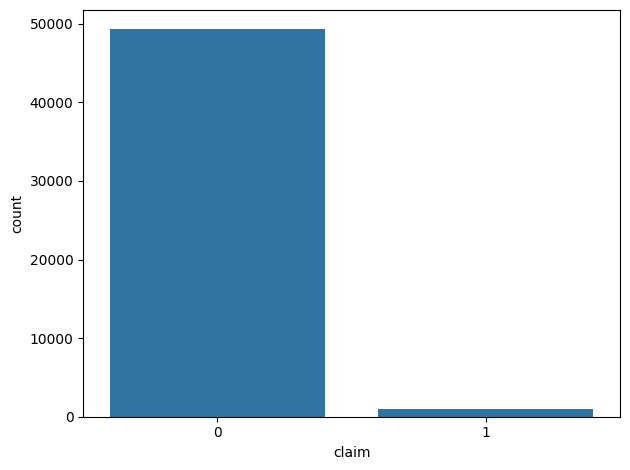

In [111]:
# grafico barras target
sns.countplot(data=df_clean,x='claim')
plt.tight_layout()

In [112]:
df_clean['claim'].value_counts()

claim
0    49284
1      923
Name: count, dtype: int64

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.

In [113]:
df_clean.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0


### 3.2 Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [114]:
# Identificar variables numéricas
variables_numericas = ['age', 'commision', 'duration', 'net_sales']

# Identificar variables categóricas  -- 'gender' no se incluye dado que se descartó en el análisis
variables_categoricas = ['agency', 'agency_type', 'destination', 'distribution_channel', 'product_name']

# Imprimir las listas
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['age', 'commision', 'duration', 'net_sales']
Variables categóricas: ['agency', 'agency_type', 'destination', 'distribution_channel', 'product_name']


#### 3.2.1 Exploración atributos numericos

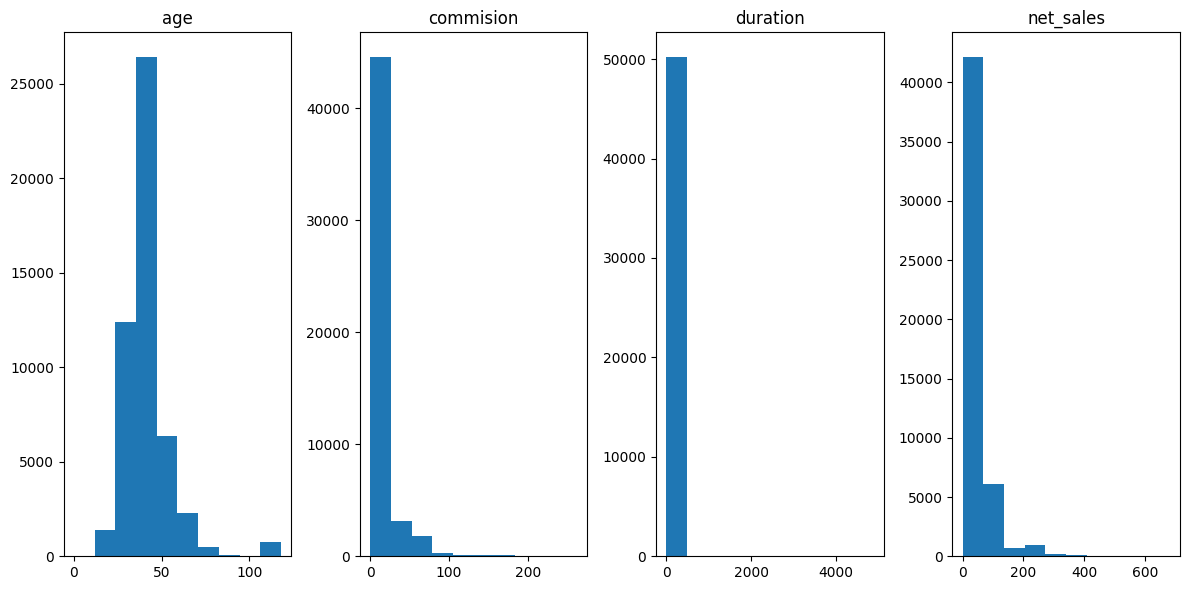

In [115]:
# Creando un histograma para cada variable numérica
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

for i, column in enumerate(variables_numericas):
    axes[i].hist(df_clean[column])
    axes[i].set_title(column)

# Ajustando el espacio entre los gráficos
plt.tight_layout()

plt.show()

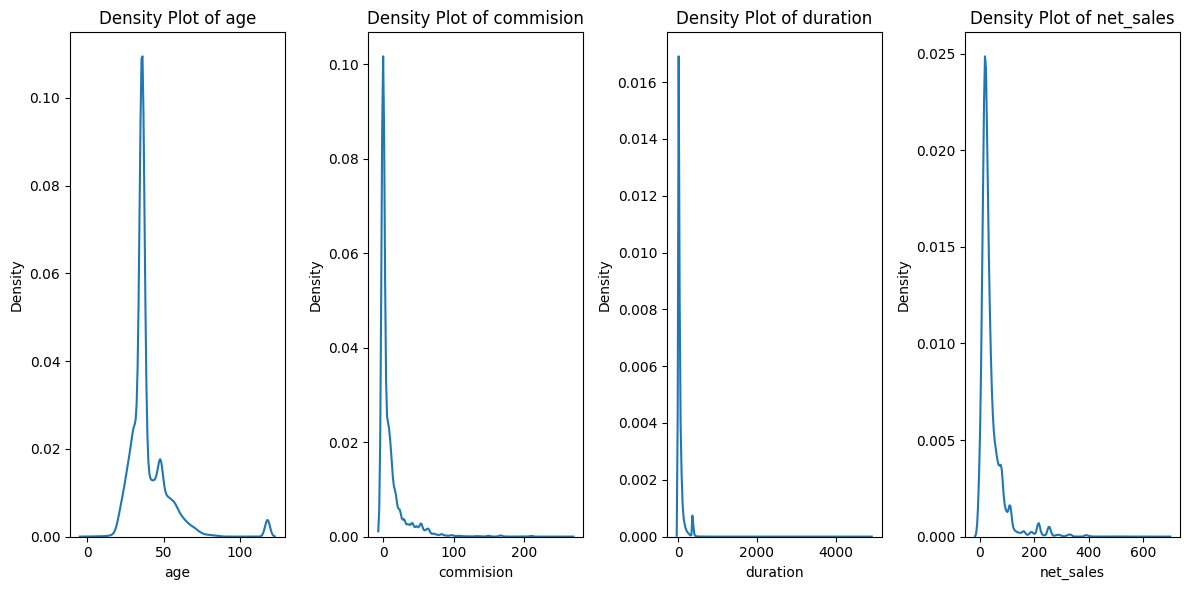

In [116]:
# Obteniendo graficos de densidad para atributos numericos

# genera grafico
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))


for i, column in enumerate(variables_numericas):
    sns.kdeplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')

# ajusta espacio entre graficos
plt.tight_layout()
plt.show()

Observamos que para todas nuestras variables la data no se encontraría correctamente distribuida por lo que se entendería que existen muchos valores atipicos.

La variable que tendría mejor distribución seria el de edad

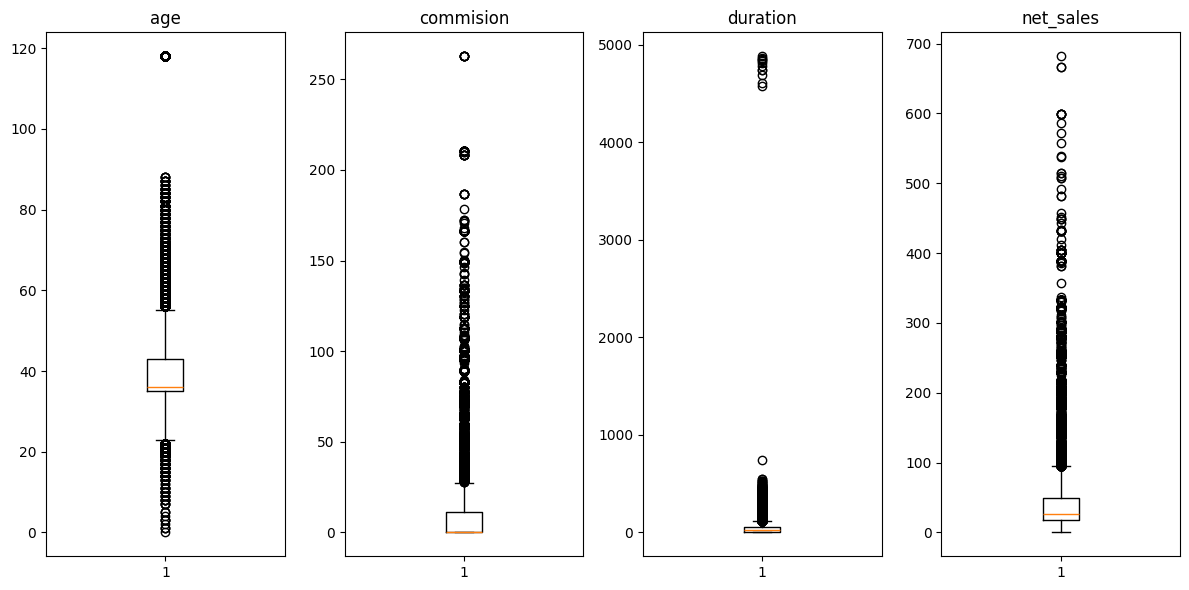

In [117]:
# Crear graficos de caja para atributos numericos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generar diagramas de caja para cada atributo numérico
for i, column in enumerate(variables_numericas):
    axes[i].boxplot(df_clean[column])
    axes[i].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Show the plot
plt.show()

observamos datos fueras de dominio para todos atributos numericos, estos serán tratados más adelante

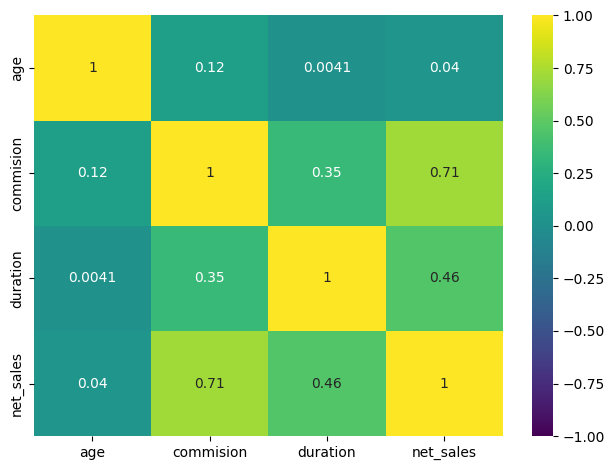

In [118]:
# generamos mapa de calor para conocer correlación entre las variables
sns.heatmap(df_clean[variables_numericas].corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)
plt.tight_layout()

observamos correlación positiva entre los datos de net_sales y commision

#### 3.2.2 Exploración atributos Categoricos

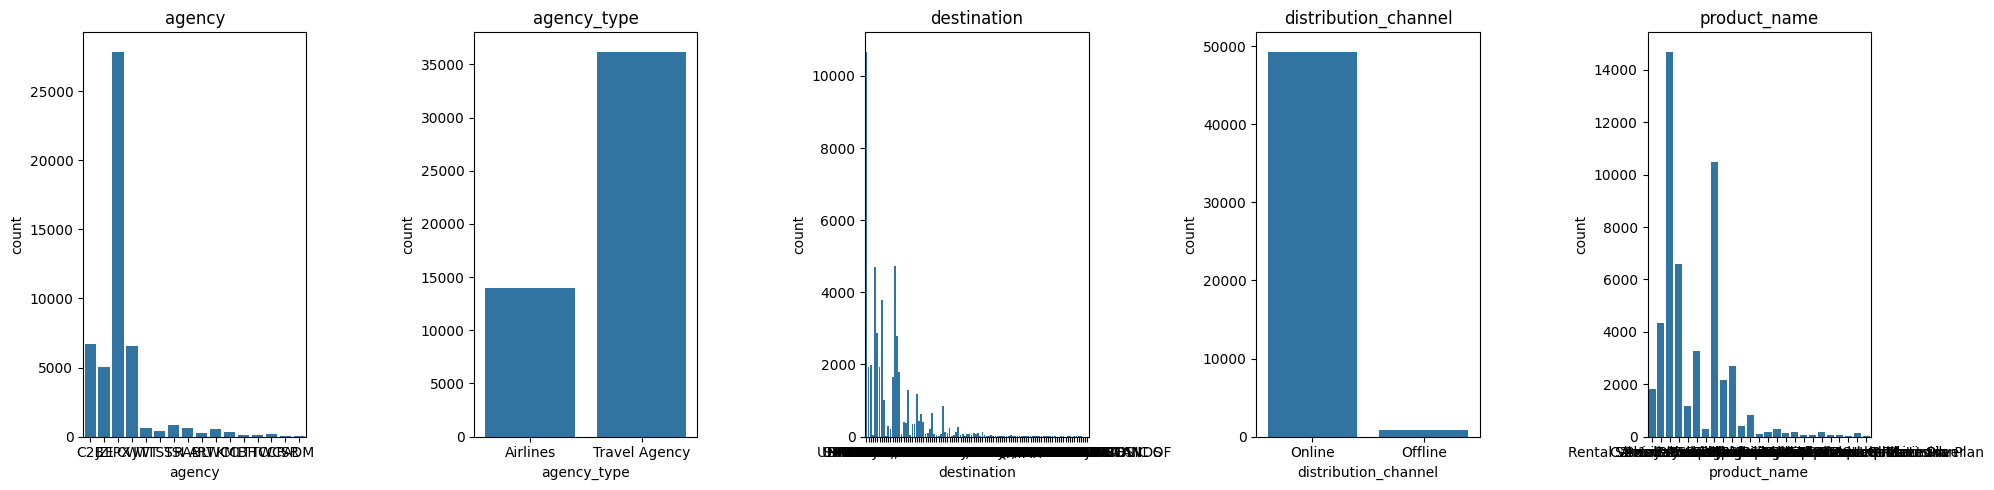

In [119]:
# Crear graficos por cada atributo categórico

fig, axes = plt.subplots(nrows=1, ncols=len(variables_categoricas), figsize=(20, 5))

# Generate plots for each categorical attribute
for i, column in enumerate(variables_categoricas):
    sns.countplot(x=column, data=df_clean, ax=axes[i])
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



Se observa que agency_type preferida es agencia de viajes, se prefiere canal de distribusión online. Para el resto de variables se explorará a detalle

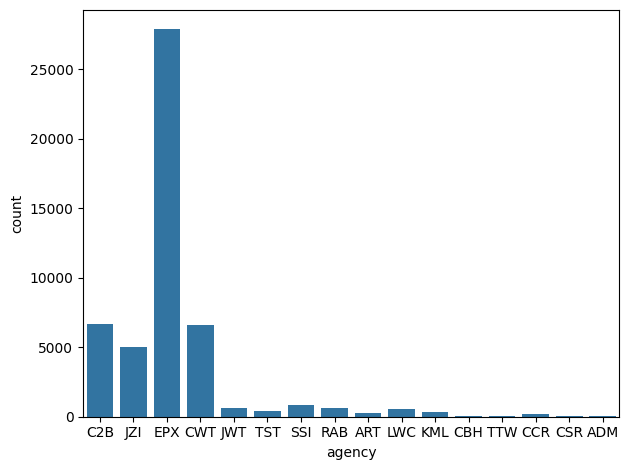

In [120]:
# ampliando vista agencias
sns.countplot(data=df_clean,x='agency')
plt.tight_layout()

agencia con mayor numero de reclamos EPX

In [121]:
netsales_mean = (df_clean.groupby('agency', as_index=False)['net_sales'].mean()).nlargest(10,'net_sales')
netsales_mean

,agency,net_sales
11,LWC,114.313153
15,TTW,93.023529
0,ADM,85.185185
2,C2B,80.377813
10,KML,56.531646
8,JWT,54.459098
6,CWT,47.649757
7,EPX,32.896740
9,JZI,32.571857
5,CSR,32.222222


In [122]:
# Generaré variable categorica en base a destination según riesgo de reclamo

def country_category(valor):
    if valor >=0.3:
        return '(1) Riesgo Alto - Reclamo mayor a 30%'
    elif valor >=0.2:
        return '(2) Riesgo Medio - Reclamo mayor a 20%'
    elif valor >0:
        return '(3) Riesgo bajo - Reclamo mayor a 1%'
    else:
        return '(4) No Reclamo'

df_clean['destination_category'] = df_clean['destination'].map(df_clean.groupby('destination')['claim'].mean().apply(country_category))

df_clean.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim,destination_category
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1,(3) Riesgo bajo - Reclamo mayor a 1%
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0,(3) Riesgo bajo - Reclamo mayor a 1%


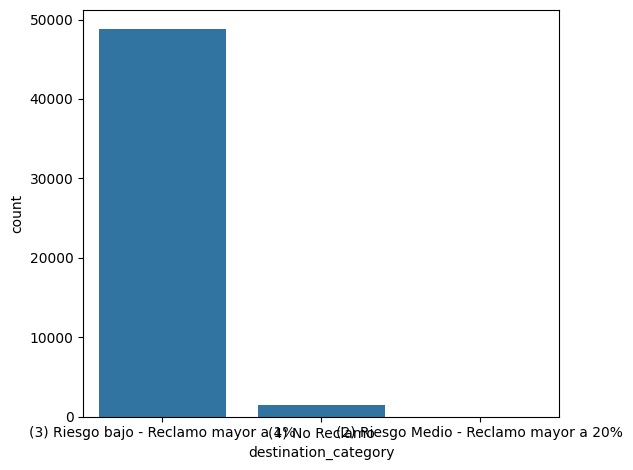

In [123]:
# ampliando vista agencias
sns.countplot(data=df_clean,x='destination_category')
plt.tight_layout()

## 4. Construcción de Features

In [124]:
sns.pairplot(df_clean,hue='claim',palette='coolwarm')
plt.tight_layout()

### 4.1 Aplicando Transformación Logaritmica a Variables Numericas

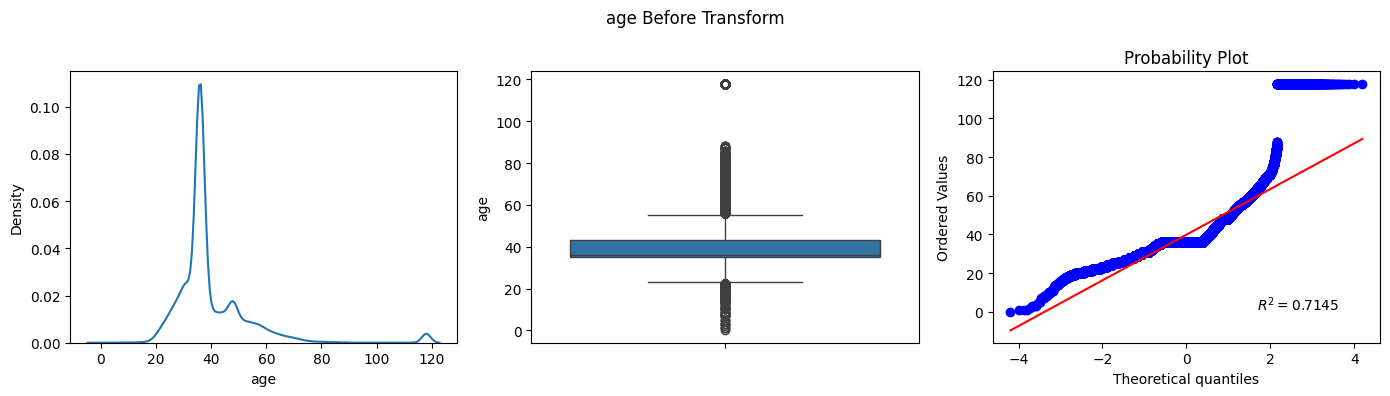

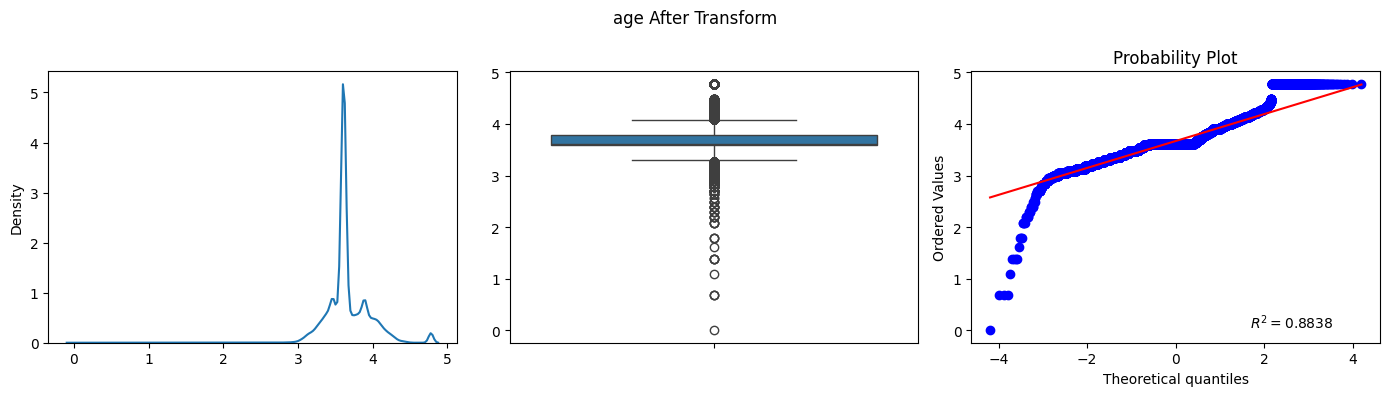

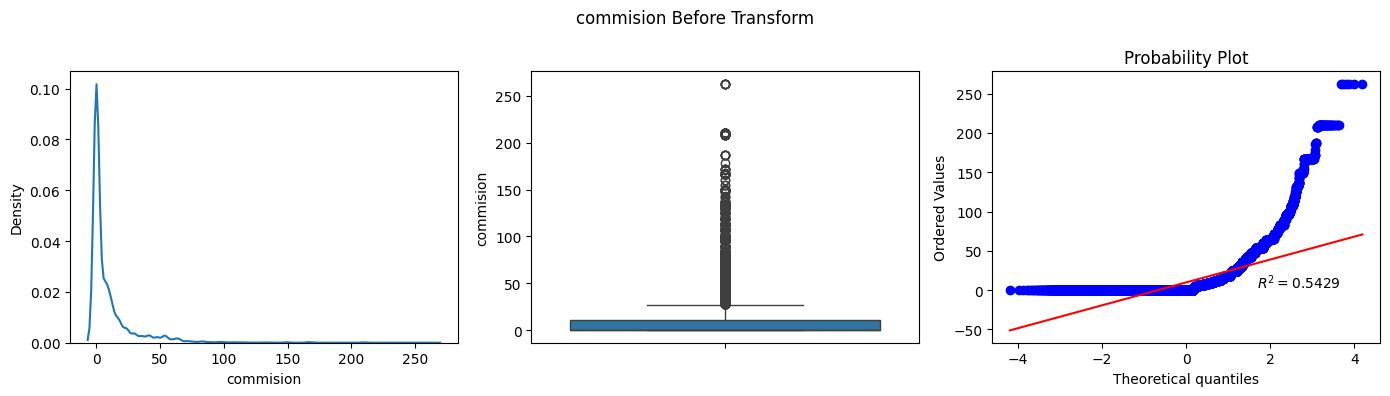

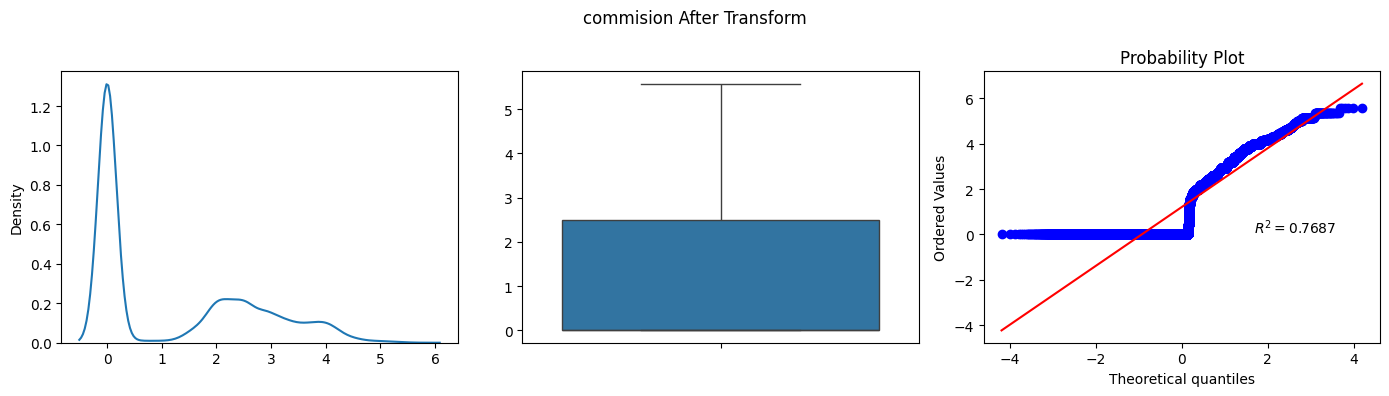

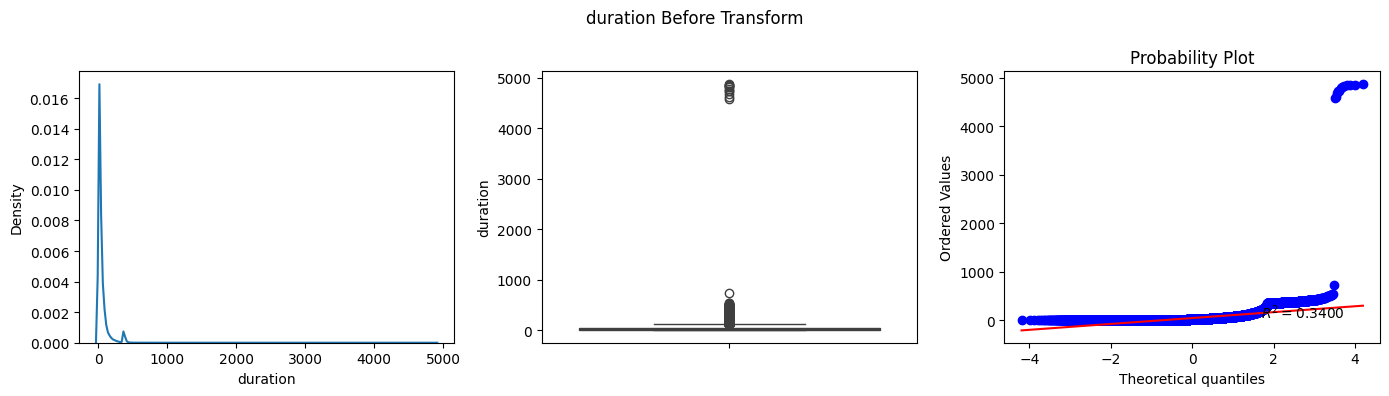

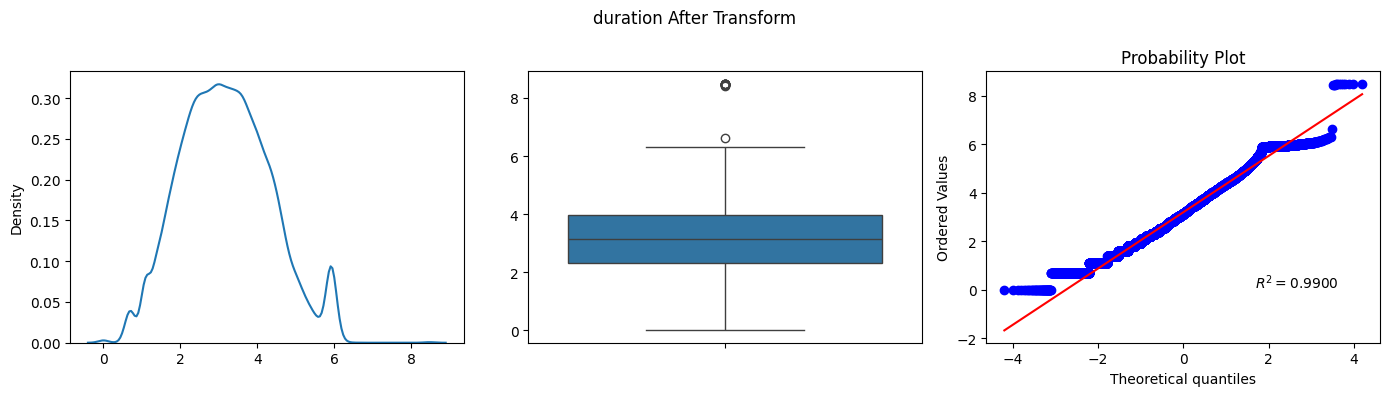

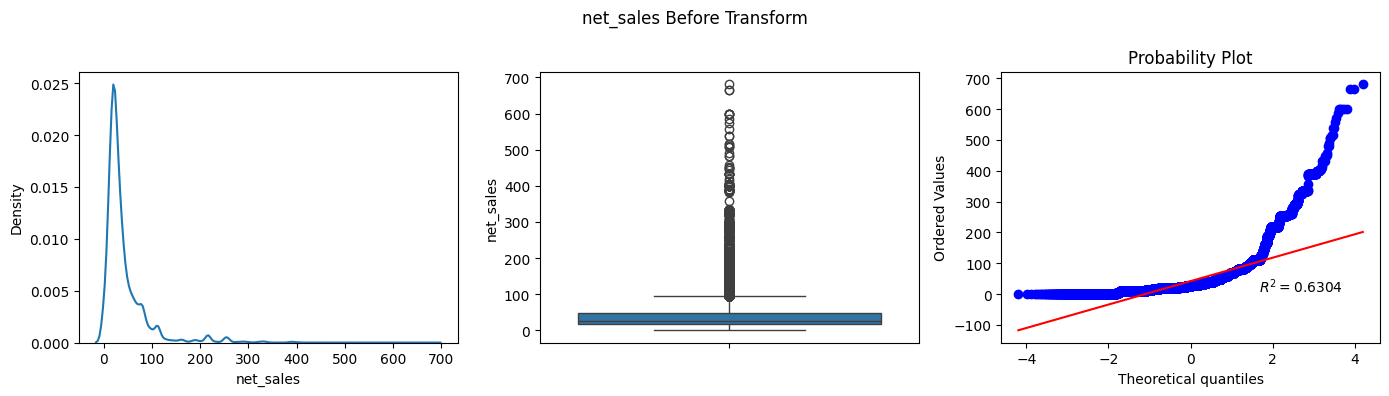

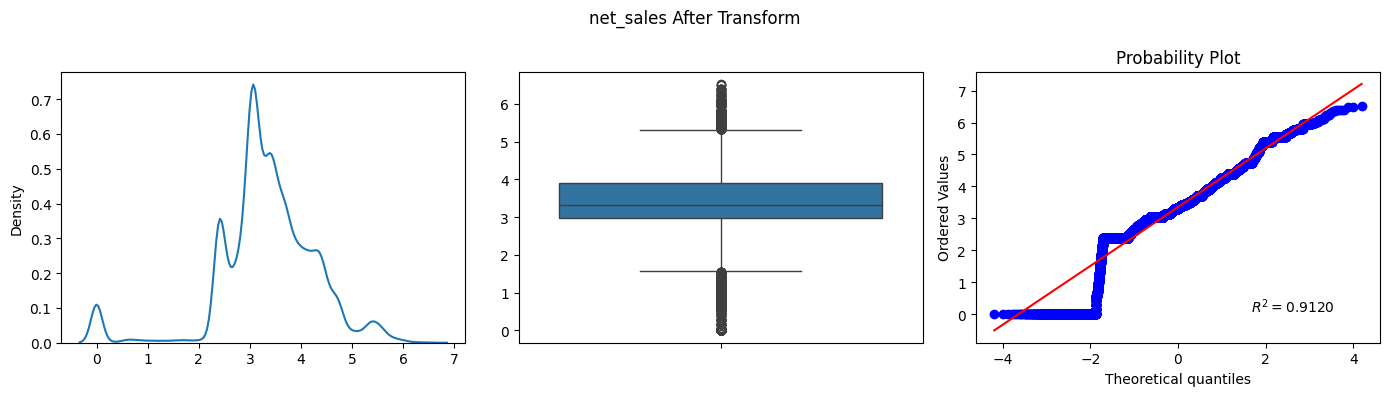

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import probplot


def log_transform(x):
    return np.log1p(x)


def apply_transform(transformer,col, df):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.kdeplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} Before Transform")
    plt.tight_layout()
    plt.show()
    col_tf = transformer.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.kdeplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,plot=plt,dist='norm')
    plt.suptitle(f"{col} After Transform")
    plt.tight_layout()
    plt.show()
    pass


# Crear el FunctionTransformer
log_transformer = FunctionTransformer(log_transform)

# observar transformacion
for column in variables_numericas:
    apply_transform(log_transformer,column,df_clean.copy())

In [ ]:
# Dada la mejoria luego de aplicar la transformación logaritmica, se procederá a aplicarla a las variables numéricas

for col in variables_numericas:
    col_tf = log_transformer.fit_transform(df_clean[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    df_clean[col] = col_tf


In [ ]:
df_clean.head(2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,product_name,claim,destination_category
0,45341,3.367296,C2B,Airlines,3.371769,SINGAPORE,Online,3.555348,4.731803,Silver Plan,1,(3) Riesgo bajo - Reclamo mayor a 1%
1,12958,3.637586,JZI,Airlines,2.635480,PHILIPPINES,Online,3.988984,3.637586,Basic Plan,0,(3) Riesgo bajo - Reclamo mayor a 1%


#### 4.1.1 Tratamiento de Outliers 

In [ ]:
def tratamiento_outlier(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    # Calculo Rango intercuartil
    IQR = upper_limit - lower_limit
    # Definiendo los whiskers
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

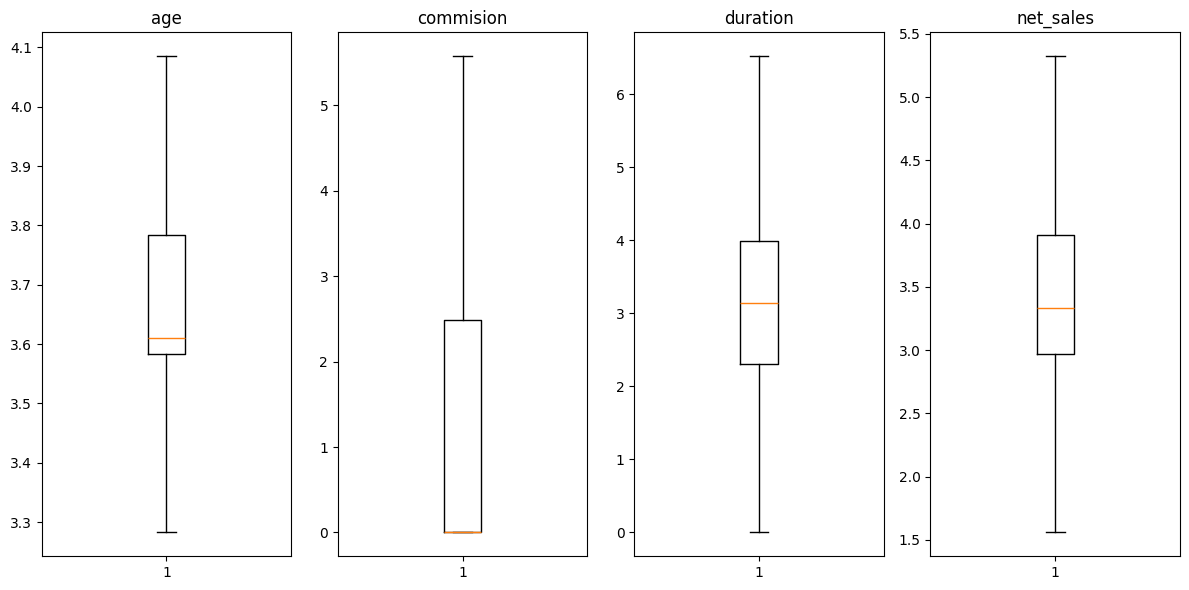

In [ ]:
# Crear graficos de caja para atributos numericos
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generar diagramas de caja luego de tratamiento de outliers
for i, column in enumerate(variables_numericas):
    axes[i].boxplot(tratamiento_outlier(df_clean,column))
    axes[i].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
for col in variables_numericas:
    df_clean[col] = tratamiento_outlier(df_clean,col)

In [ ]:
df_clean.shape

### 4.2 Trasformación Variables Categoricas

In [84]:
variables_categoricas.remove('destination')

variables_categoricas.append('destination_category')

variables_categoricas

['agency',
 'agency_type',
 'distribution_channel',
 'product_name',
 'destination_category']

In [85]:
# Aplicaremos transformaciones de codificación a las variables categóricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

agency_type_encoder = OrdinalEncoder(categories=[['Airlines','Travel Agency']])
df_clean.agency_type = agency_type_encoder.fit_transform(df_clean[['agency_type']])
df_clean.agency_type = df_clean.agency_type.astype(int)

In [86]:
categories = ['(1) Riesgo Alto - Reclamo mayor a 30%','(2) Riesgo Medio - Reclamo mayor a 20%', '(3) Riesgo bajo - Reclamo mayor a 1%', '(4) No Reclamo']

destination_category_encoder = OrdinalEncoder(categories=[categories])
df_clean.destination_category = destination_category_encoder.fit_transform(df_clean[['destination_category']])
df_clean.destination_category = df_clean.destination_category.astype(int)

In [87]:
distribution_chn_encoder = OrdinalEncoder(categories=[['Offline','Online']])
df_clean.distribution_channel = distribution_chn_encoder.fit_transform(df_clean[['distribution_channel']])
df_clean.distribution_channel = df_clean.distribution_channel.astype(int)

In [88]:
# Product Name
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df_clean[['product_name']])

# Convertir a DataFrame y eliminar la última columna
product_encoder = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['product_name']))
# product_encoder = product_encoder.iloc[:, :-1]  # Elimina la última columna

product_encoder.head(2)

,product_name_1 way Comprehensive Plan,product_name_2 way Comprehensive Plan,product_name_24 Protect,product_name_Annual Gold Plan,product_name_Annual Silver Plan,product_name_Annual Travel Protect Gold,product_name_Annual Travel Protect Platinum,product_name_Annual Travel Protect Silver,product_name_Basic Plan,product_name_Bronze Plan,...,product_name_Premier Plan,product_name_Rental Vehicle Excess Insurance,product_name_Silver Plan,product_name_Single Trip Travel Protect Gold,product_name_Single Trip Travel Protect Platinum,product_name_Single Trip Travel Protect Silver,product_name_Spouse or Parents Comprehensive Plan,product_name_Ticket Protector,product_name_Travel Cruise Protect,product_name_Value Plan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df_clean = pd.concat([df_clean,product_encoder],axis=1)
df_clean.drop('product_name',axis=1,inplace=True)
df_clean.head()

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,net_sales,claim,...,product_name_Premier Plan,product_name_Rental Vehicle Excess Insurance,product_name_Silver Plan,product_name_Single Trip Travel Protect Gold,product_name_Single Trip Travel Protect Platinum,product_name_Single Trip Travel Protect Silver,product_name_Spouse or Parents Comprehensive Plan,product_name_Ticket Protector,product_name_Travel Cruise Protect,product_name_Value Plan
0,45341.0,3.367296,C2B,0.0,3.371769,SINGAPORE,1.0,3.555348,4.731803,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12958.0,3.637586,JZI,0.0,2.635480,PHILIPPINES,1.0,3.988984,3.637586,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18233.0,3.332205,EPX,1.0,0.000000,UNITED STATES,1.0,3.367296,2.639057,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31742.0,3.610918,EPX,1.0,0.000000,SAUDI ARABIA,1.0,0.693147,3.555348,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14381.0,3.295837,CWT,1.0,3.209229,THAILAND,1.0,3.526361,3.703768,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_clean.shape


(59784, 36)

In [91]:
# Agencia

encoded_data = encoder.fit_transform(df_clean[['agency']])

# Convertir a DataFrame y eliminar la última columna
agencies_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['agency']))
agencies_encoded = agencies_encoded.iloc[:, :-1]  # Elimina la última columna
agencies_encoded.head(2)

,agency_ADM,agency_ART,agency_C2B,agency_CBH,agency_CCR,agency_CSR,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_clean = pd.concat([df_clean,agencies_encoded],axis=1)
df_clean.drop('agency',axis=1,inplace=True)
df_clean.head()

,id,age,agency_type,commision,destination,distribution_channel,duration,net_sales,claim,destination_category,...,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW
0,45341.0,3.367296,0.0,3.371769,SINGAPORE,1.0,3.555348,4.731803,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12958.0,3.637586,0.0,2.635480,PHILIPPINES,1.0,3.988984,3.637586,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18233.0,3.332205,1.0,0.000000,UNITED STATES,1.0,3.367296,2.639057,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31742.0,3.610918,1.0,0.000000,SAUDI ARABIA,1.0,0.693147,3.555348,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14381.0,3.295837,1.0,3.209229,THAILAND,1.0,3.526361,3.703768,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
# Elimino columna destination
df_clean.drop('destination',axis=1,inplace=True)

df_clean.head(2)

,id,age,agency_type,commision,distribution_channel,duration,net_sales,claim,destination_category,product_name_1 way Comprehensive Plan,...,agency_CWT,agency_EPX,agency_JWT,agency_JZI,agency_KML,agency_LWC,agency_RAB,agency_SSI,agency_TST,agency_TTW
0,45341.0,3.367296,0.0,3.371769,1.0,3.555348,4.731803,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12958.0,3.637586,0.0,2.635480,1.0,3.988984,3.637586,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61762 entries, 0 to 59776
Data columns (total 50 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 50207 non-null  float64
 1   age                                                50207 non-null  float64
 2   agency_type                                        50207 non-null  float64
 3   commision                                          50207 non-null  float64
 4   distribution_channel                               50207 non-null  float64
 5   duration                                           50207 non-null  float64
 6   net_sales                                          50207 non-null  float64
 7   claim                                              50207 non-null  float64
 8   destination_category                               50207 non-null  float64
 9   product_nam

### 4.3 Balance Clase Target

In [95]:
df_clean.shape

(61762, 50)

In [47]:
# Se empleará técnica de SMOTE con el fin de sobremuestrear la clase minoritaria.
from imblearn.over_sampling import SMOTE


# Separo las variables independientes y dependiente
X = df_clean.drop('claim', axis=1)
y = df_clean['claim']

# Aplicando SMOTE para sobremuestrear
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Actualizo el dataframe
df_clean = pd.concat([X_resampled, y_resampled], axis=1)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df_clean[['product_name']])

# Convertir a DataFrame y eliminar la última columna
product_encoder = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['product_name']))
# product_encoder = product_encoder.iloc[:, :-1]  # Elimina la última columna

product_encoder.head(2)

In [ ]:
import seaborn as sns

# Create density plots for numeric variables
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(12, 6))

# Generate density plots for each numeric variable
for i, column in enumerate(variables_numericas):
    sns.kdeplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Density Plot of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Crear graficos por cada atributo numerico
fig, axes = plt.subplots(nrows=1, ncols=len(variables_numericas), figsize=(20, 5))

# Generar diagramas de caja para cada atributo numérico
for i, column in enumerate(variables_numericas):
    axes[i].hist(df_clean[column])
    axes[i].set_title(column)

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import plotly.express as px

fig = px.histogram(df_clean, x='duration')
fig.update_layout(title='Histogram of Duration')
fig.show()